In [1]:
import numpy as np

Ngen=100000
samp = 100


amean = 27
asig = 0.5
bmean = 6
bsig = 0.4
eps=1

ymean = bmean/(amean-eps*bmean)

A = amean*np.ones((Ngen,samp)) + np.random.normal(0,asig,(Ngen,samp))
print(np.shape(A))
B = bmean*np.ones((Ngen,samp)) + np.random.normal(0,bsig,(Ngen,samp))
print(np.shape(B))


sigx = 0.02
Y = (B/(A-eps*B)) + np.random.normal(0,sigx,(Ngen,samp))
dydb = amean/((amean-eps*bmean)**2)
dyda = -bmean/((amean-eps*bmean)**2)
sigy = np.sqrt(dydb**2*bsig**2 + dyda**2*asig**2)


print(np.shape(Y))
print(Y)
print(sigy)


(100000, 100)
(100000, 100)
(100000, 100)
[[0.31266454 0.30080108 0.32842774 ... 0.28944722 0.31895414 0.28708666]
 [0.25428013 0.26625758 0.24350972 ... 0.2692838  0.29702669 0.28557646]
 [0.29072654 0.27331736 0.30446565 ... 0.30642535 0.28799327 0.28820497]
 ...
 [0.29378072 0.33495004 0.31468038 ... 0.29354795 0.27027884 0.27974462]
 [0.28703753 0.25732161 0.26584079 ... 0.28288371 0.27939275 0.32387136]
 [0.34293421 0.26291722 0.2968306  ... 0.31702211 0.19223    0.26854142]]
0.02541706352689715


In [2]:
#define a Gaussian 
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [3]:
#do a fit
from scipy.optimize import curve_fit


val = []
val_stat = []
err = []
for i in np.arange(0,np.shape(Y)[1]):
    v = Y[:,i]
    nv,nvx = np.histogram(v,100,range=(ymean-10*sigx,ymean+10*sigx))
    xvc = (nvx[:-1] + nvx[1:]) / 2
    pars,parerr = curve_fit(gaus,xvc,nv,p0=[1000, ymean, sigx])
    #print(np.std(v))
    #print(sigy)
    val_stat.append(np.sqrt(np.std(v)**2-sigy**2))
    val.append(np.sqrt(pars[2]**2-sigy**2))
    err.append(np.sqrt(pars[2]**2/(pars[2]**2-sigy**2)*parerr[2,2]))
    #err.append(np.sqrt(parerr[2,2]))
    
n,nx = np.histogram(Y[:,0],100,range=(ymean-10*sigx,ymean+10*sigx))

xc = (nx[:-1] + nx[1:]) / 2

print(np.shape(n))
print(np.shape(xc))
print(n)

(100,)
(100,)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    1    0    2    3    7   12   14   15   22   40   64   79
  116  183  209  338  428  589  750  975 1200 1400 1848 2091 2446 2884
 3237 3515 4049 4185 4573 4750 4863 4828 4758 4843 4679 4578 4157 3872
 3615 3198 2879 2509 2075 1790 1477 1250 1032  816  670  516  403  307
  222  175  131  103   71   54   37   24   19    4   10    4    2    3
    0    0    0    1    0    0    0    0    0    0    0    0    0    0
    0    0]


In [4]:


popt,pcov = curve_fit(gaus,xc,n,p0=[1000, ymean, sigx])

print(popt)
print(pcov)

[4.92181821e+03 2.85779155e-01 3.24166119e-02]
[[ 1.41734434e+02  8.28688938e-11 -6.22339338e-04]
 [ 8.28688938e-11  8.19785798e-09 -5.58850865e-16]
 [-6.22339338e-04 -5.58850865e-16  8.19785811e-09]]


In [5]:
#set up a plot 
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerLine2D
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

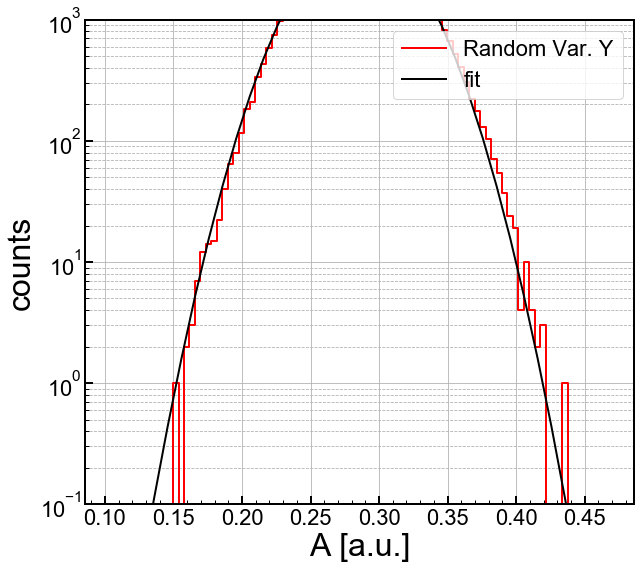

In [6]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

X = np.arange(ymean-10*sigx,ymean+10*sigx,0.01)

step, = ax1.step(xc,n, where='mid',color='r', linestyle='-', label='Random Var. Y', linewidth=2)
ax1.plot(X,gaus(X,*popt),'k-',label='fit')


ymin=0.1
ymax=1000


ax1.set_yscale('log')
ax1.set_xlim(ymean-10*sigx, ymean+10*sigx)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel('A [a.u.]',**axis_font)
ax1.set_ylabel('counts',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figures')
plt.show()

In [7]:
sig_extract = np.sqrt(popt[2]**2-sigy**2)

err_extract = np.sqrt(1/(4*(sig_extract**2-sigy**2))*pcov[2,2])

print('{0:3.2f} +/- {1:3.2f}'.format(sig_extract,err_extract))

0.02 +/- nan


/home/phys/villaa/python/anaconda3/envs/py365/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


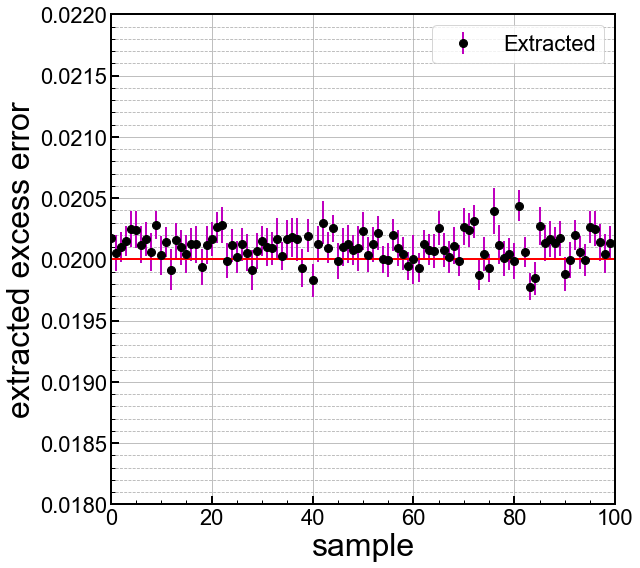

In [8]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

val_stat = np.asarray(val_stat)
val = np.asarray(val)
err = np.asarray(err)
xerr=np.zeros(np.shape(err))

ax1.errorbar(np.arange(0,np.shape(val_stat)[0]),val_stat,yerr=[err,err], marker='o', markersize=8, \
             ecolor='m',color='k', linestyle='none', label='Extracted', linewidth=2)


ax1.axhline(sigx,linestyle='-',color='r')

ymin=sigx-0.1*sigx
ymax=sigx+0.1*sigx


ax1.set_yscale('linear')
ax1.set_xlim(0, np.shape(val)[0]) #in pairs
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel('sample',**axis_font)
ax1.set_ylabel('extracted excess error',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figures')
plt.show()

In [9]:
print('{0:3.3f} +/- {1:3.3f}'.format(np.mean(val),(1/np.float(np.shape(err)[0]))*np.sqrt(np.sum(err**2))))

0.020 +/- 0.000


0.00011962814237179311


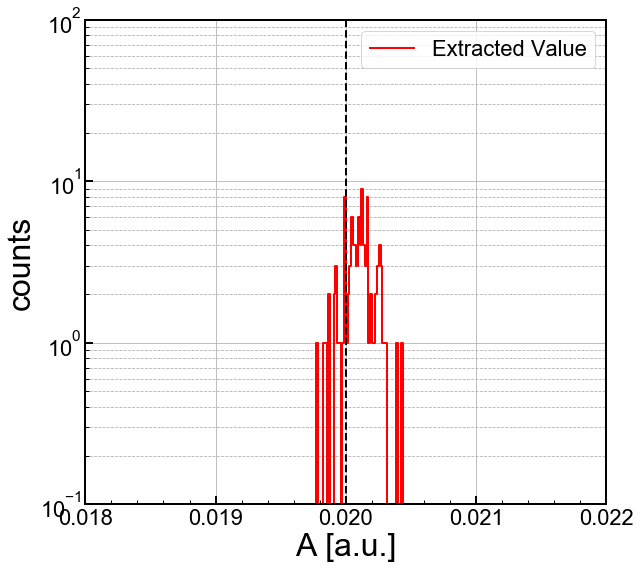

In [10]:
xmin=sigx-0.1*sigx
xmax=sigx+0.1*sigx

print(np.std(val_stat))

n_res,n_resx = np.histogram(val_stat,300,range=(xmin,xmax))


xresc = (n_resx[:-1] + n_resx[1:]) / 2

#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

X = np.arange(sigx-sigx,sigx+sigx,0.01)

step, = ax1.step(xresc,n_res, where='mid',color='r', linestyle='-', label='Extracted Value', linewidth=2)
ax1.axvline(sigx,linestyle='--',color='k')


ymin=0.1
ymax=100


ax1.set_yscale('log')
ax1.set_xlim(xmin, xmax) #in pairs
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel('A [a.u.]',**axis_font)
ax1.set_ylabel('counts',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figures')
plt.show()